In [ ]:
!pip install yfinance

In [ ]:
!python -m pip install git+https://github.com/pydata/pandas-datareader.git

In [ ]:
import os
os.kill(os.getpid(), 9)

/tmp/ipykernel_56843/2777194432.py:12: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['mad'] = df['TP'].rolling(ndays).apply(lambda x: pd.Series(x).mad())


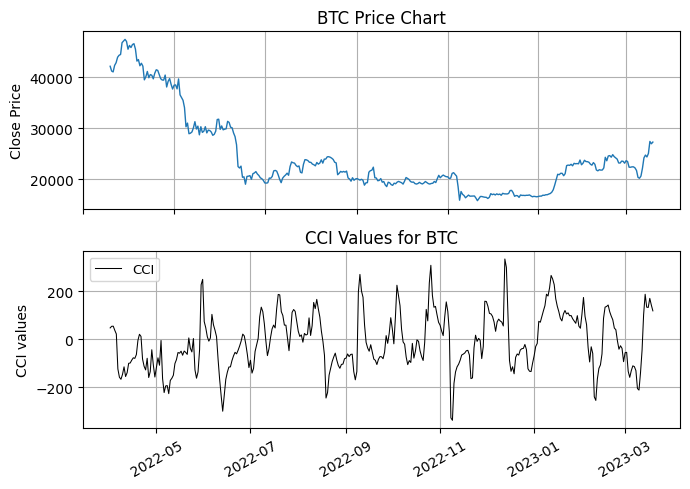

In [8]:
# Commodity Channel Index Python Code
# Load the necessary libraries
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Commodity Channel Index
def CCI(df, ndays):
    df['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
    df['sma'] = df['TP'].rolling(ndays).mean()
    df['mad'] = df['TP'].rolling(ndays).apply(lambda x: pd.Series(x).mad())
    df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad'])
    return df

# Create a ticker object for Bitcoin (BTC-USD)
btc_ticker = yf.Ticker("BTC-USD")

# Get historical prices for the last year
btc_history = btc_ticker.history(period="1y")

# Convert Bitcoin prices to a pandas DataFrame object
data = pd.DataFrame(btc_history)

# Compute the Commodity Channel Index (CCI) for BTC based 
# on the 14-day moving average
n = 14
BTC_CCI = CCI(data, n)

# Plot the price series chart and the Commodity Channel Index
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('BTC Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2,1,2)
plt.plot(BTC_CCI['CCI'],'k',lw=0.75,linestyle='-',label='CCI')
plt.title('CCI Values for BTC')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()

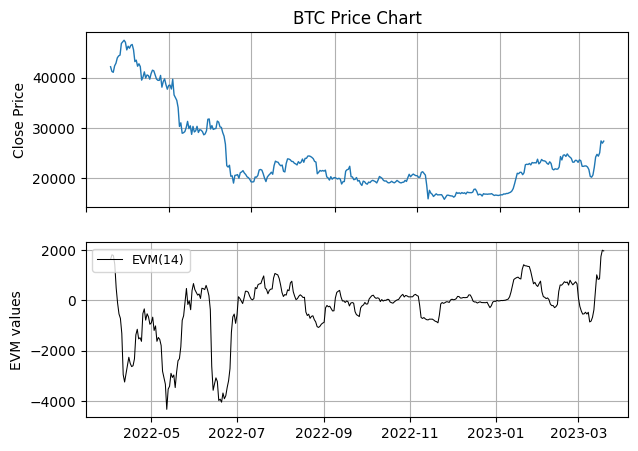

In [17]:
# Ease Of Movement (EVM) Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd

# Ease Of Movement
def EVM(data, ndays):
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + 
                                             data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EVM = dm / br
    EVM_MA = pd.Series(EVM.rolling(ndays).mean(), name = 'EVM')
    data = data.join(EVM_MA)
    return data

# Create a ticker object for Bitcoin (BTC-USD)
btc_ticker = yf.Ticker("BTC-USD")

# Get historical prices for the last year
btc_history = btc_ticker.history(period="1y")

# Create a Data Frame from received data
data = pd.DataFrame(btc_history)

# Compute the 14-day Ease Of Movement for BTC
n = 14
BTC_EVM = EVM(data, n)
EVM = BTC_EVM['EVM']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('BTC Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2,1,2)
plt.plot(EVM,'k',lw=0.75,linestyle='-',label='EVM(14)')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('EVM values')
plt.grid(True)
# plt.setp(plt.gca().get_xticklabels(), rotation=30)

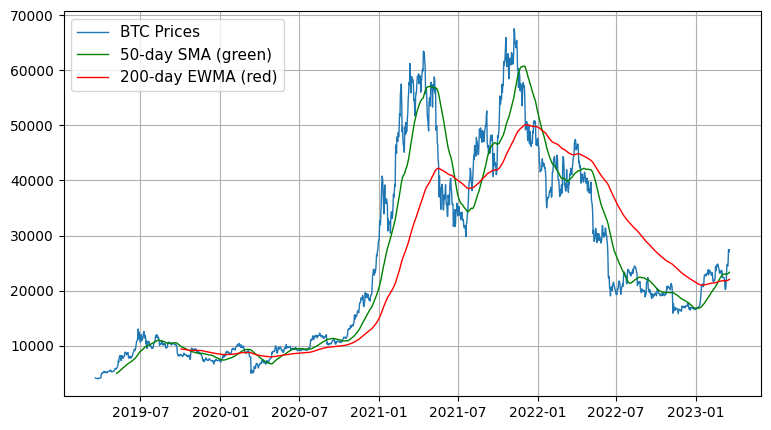

In [16]:
# Moving Averages Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd

# Simple Moving Average
def SMA(data, ndays):
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA')
    data = data.join(SMA)
    return data

# Exponentially-weighted Moving Average
def EWMA(data, ndays):
    EMA = pd.Series(data['Close'].ewm(span = ndays,
                                     min_periods = ndays - 1).mean(),
                   name = 'EWMA_' + str(ndays))
    data = data.join(EMA)
    return data

# Create a ticker object for Bitcoin (BTC-USD)
btc_ticker = yf.Ticker("BTC-USD")

# Get historical prices for the last year
btc_history = btc_ticker.history(period="4y")

# Create a Data Frame from received data
data = pd.DataFrame(btc_history)

# Create a separate Series
close = data['Close']

# Compute the 50-dat SMA for BTC
n = 50
SMA_BTC = SMA(data,n)
SMA_BTC = SMA_BTC.dropna()
SMA = SMA_BTC['SMA']

# Compute the 200-day EWMA for BTC
ew = 200
EWMA_BTC = EWMA(data,ew)
EWMA_BTC = EWMA_BTC.dropna()
EWMA = EWMA_BTC['EWMA_200']

# Plotting BTC Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['Close'],lw=1,label='BTC Prices')
plt.plot(SMA,'g',lw=1,label='50-day SMA (green)')
plt.plot(EWMA,'r',lw=1,label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
# plt.setp(plt.gca().get_xticklabels(),rotation=30)

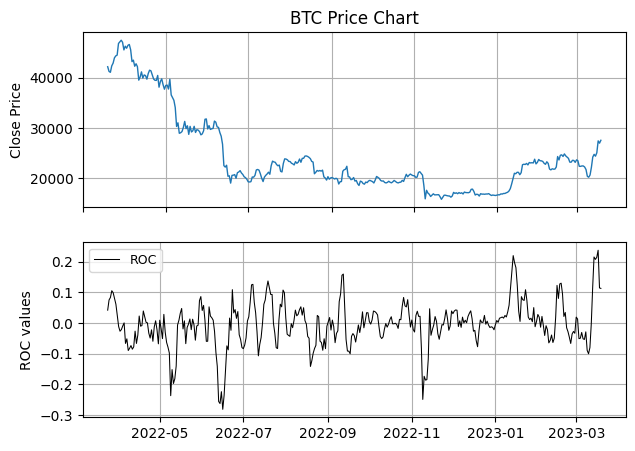

In [21]:
# Rate Of Change Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Rate Of Change (ROC)
def ROC(data, n):
    N = data['Close'].diff(n)
    D = data['Close'].shift(n)
    ROC = pd.Series(N/D, name='Rate Of Change')
    data = data.join(ROC)
    return data

# Create a ticker object for Bitcoin (BTC-USD)
btc_ticker = yf.Ticker("BTC-USD")

# Get historical prices for the last year
btc_history = btc_ticker.history(period="1y")

# Create a Data Frame from received data
data = pd.DataFrame(btc_history)

# Compute the 5-period Rate Of Change for BTC
n = 5
BTC_ROC = ROC(data, n)
ROC = BTC_ROC['Rate Of Change']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('BTC Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2,1,2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC values')
plt.grid(True)
# plt.setp(plt.gca().get_xticklabels(),rotation=30)

                                UpperBB       LowerBB
Date                                                 
2020-03-19 00:00:00+00:00           NaN           NaN
2020-03-20 00:00:00+00:00           NaN           NaN
2020-03-21 00:00:00+00:00           NaN           NaN
2020-03-22 00:00:00+00:00           NaN           NaN
2020-03-23 00:00:00+00:00           NaN           NaN
...                                 ...           ...
2023-03-15 00:00:00+00:00  25233.306745  20840.649349
2023-03-16 00:00:00+00:00  25344.801351  20806.551931
2023-03-17 00:00:00+00:00  25744.342375  20582.657000
2023-03-18 00:00:00+00:00  26036.908112  20445.577278
2023-03-19 00:00:00+00:00  26376.271001  20285.760639

[1096 rows x 2 columns]


<Axes: xlabel='Date'>

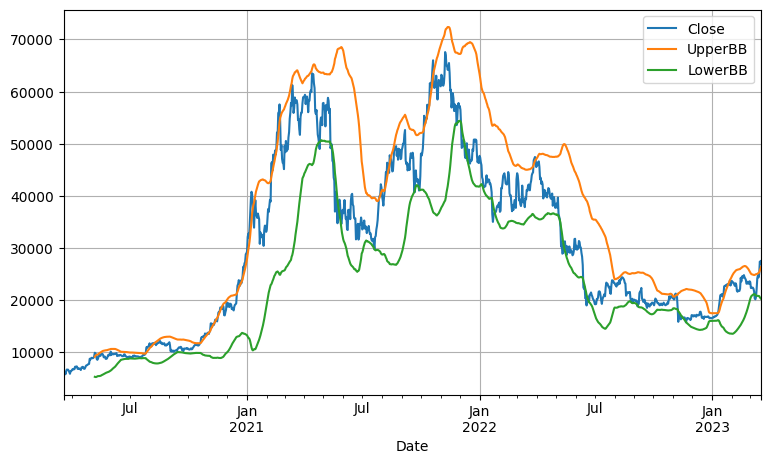

In [30]:
# Bollinger Bands Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

# Compute the Bollinger Bands
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD)
    data['LowerBB'] = MA - (2 * SD)
    return data

# Create a ticker object for Bitcoin (BTC-USD)
btc_ticker = yf.Ticker("BTC-USD")

# Get historical prices for the last year
btc_history = btc_ticker.history(period="3y")

# Create a Data Frame from received data
data = pd.DataFrame(btc_history)

# Compute the Bollinger Bands from BTC using the 50-day Moving Average
n = 50
BTC_BBANDS = BBANDS(data, n)
print(BTC_BBANDS[['UpperBB', 'LowerBB']])

# Create the plot
pd.concat([BTC_BBANDS.Close,BTC_BBANDS.UpperBB,BTC_BBANDS.LowerBB],
         axis=1).plot(figsize=(9,5), grid=True)

In [32]:
# Force Index for BTC
# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Force Index
def ForceIndex(data, ndays):
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'],
                  name = 'ForceIndex')
    data = data.join(FI)
    return data

# Create a ticker object for Bitcoin (BTC-USD)
btc_ticker = yf.Ticker("BTC-USD")

# Get historical prices for the last year
btc_history = btc_ticker.history(period="3y")

# Create a Data Frame from received data
data = pd.DataFrame(btc_history)

# Compute the Force Index for BTC
n = 1
BTC_ForceIndex = ForceIndex(data, n)
print(BTC_ForceIndex['ForceIndex'])

Date
2020-03-19 00:00:00+00:00             NaN
2020-03-20 00:00:00+00:00    4.129744e+11
2020-03-21 00:00:00+00:00   -5.826794e+11
2020-03-22 00:00:00+00:00   -1.422782e+13
2020-03-23 00:00:00+00:00    2.724706e+13
                                 ...     
2023-03-15 00:00:00+00:00   -1.615755e+13
2023-03-16 00:00:00+00:00    2.292150e+13
2023-03-17 00:00:00+00:00    1.202886e+14
2023-03-18 00:00:00+00:00   -1.636296e+13
2023-03-19 00:00:00+00:00    2.030670e+13
Name: ForceIndex, Length: 1096, dtype: float64
